# Problem statement - Term Deposit Subcription

We have data from a Portuguese bank on details of customers related to selling a term deposit
The objective of the project is to help the marketing team identify potential customers who are relatively more likely to subscribe to the term deposit and this increase the hit ratio
## What is a Term Deposit?
A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

# Data dictionary

**Bank client data**
* 1 - age 
* 2 - job : type of job 
* 3 - marital : marital status
* 4 - education 
* 5 - default: has credit in default? 
* 6 - housing: has housing loan? 
* 7 - loan: has personal loan?
* 8 - balance in account

**Related to previous contact**
* 8 - contact: contact communication type
* 9 - month: last contact month of year
* 10 - day: last contact day of the month
* 11 - duration: last contact duration, in seconds*

**Other attributes**
* 12 - campaign: number of contacts performed during this campaign and for this client
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign
* 14 - previous: number of contacts performed before this campaign and for this client
* 15 - poutcome: outcome of the previous marketing campaign

**Output variable ('Target'):has the client subscribed a term deposit?**



## Index
- <a href = #link1>Import libraries and load dataset</a>
- <a href = #link2>Deliverable 1 - EDA</a>
- <a href = #link3>Deliverable 2 - Prepare data to build model</a>
- <a href = #link4>Deliverable 3 - Create the model</a>
- <a href = #link5>Business Insights</a>

## <a id = "link1"></a>Import Libraries and Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# To enable plotting graphs in Jupyter notebook
import seaborn as sns

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#Load the file from local directory using pd.read_csv which is a special form of read_table
bank_df = pd.read_csv("bank-full.csv")
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## <a id = "link2"></a>Deliverable 1 - EDA

### Univariate

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- There are 45,211 total rows in the dataset and 17 columns (16 predictors and 1 target varaible).
- We can see that there are no missing values as number of non-null count is same as total count for each column.

In [5]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


- Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)
- The mean balance is 1,362. The Standard Deviation (std) is a high number (3,044) so we can understand through this that the balance is heavily distributed across the dataset.

In [6]:
bank_df.skew()

age         0.68
balance     8.36
day         0.09
duration    3.14
campaign    4.90
pdays       2.62
previous   41.85
dtype: float64

- We can see that most of the variables are skewed, we can verify the same using distplots/histograms.
- 'previous' variables has the largest skewness. We can verify the same if we observe the result from df.describe(). Most of the values are 0 and maximum value is 275, so the distribution is right skewed.

**We have analyzed numerical variables, now let's print all the categorical columns.**

In [7]:
for i in bank_df.columns[bank_df.dtypes=='object']:
    print(i,":")
    print()
    print(bank_df[i].value_counts(normalize=True)*100)
    print()
    print()

job :

blue-collar     21.53
management      20.92
technician      16.80
admin.          11.44
services         9.19
retired          5.01
self-employed    3.49
entrepreneur     3.29
unemployed       2.88
housemaid        2.74
student          2.07
unknown          0.64
Name: job, dtype: float64


marital :

married    60.19
single     28.29
divorced   11.52
Name: marital, dtype: float64


education :

secondary   51.32
tertiary    29.42
primary     15.15
unknown      4.11
Name: education, dtype: float64


default :

no    98.20
yes    1.80
Name: default, dtype: float64


housing :

yes   55.58
no    44.42
Name: housing, dtype: float64


loan :

no    83.98
yes   16.02
Name: loan, dtype: float64


contact :

cellular    64.77
unknown     28.80
telephone    6.43
Name: contact, dtype: float64


month :

may   30.45
jul   15.25
aug   13.82
jun   11.81
nov    8.78
apr    6.49
feb    5.86
jan    3.10
oct    1.63
sep    1.28
mar    1.06
dec    0.47
Name: month, dtype: float64


poutcome :

u

### Insights
- We can see that the data for two classes in the target variable is imbalanced.
- 'default' column has majority of values (approx 98%) as 'no'. We can drop this column as it won't provide much information for the model.
- Columns like - jobs and poutcome have 'unknown' values. We can either drop it, but then we will lose data as poutcome have approx 81% 'unknown' values. So, we are going to treat 'unknown' as separate category. 

In [8]:
bank_df.drop(columns='default',inplace=True)

**Let's create a general function to plot distplots for numerical variables and countplots for categorical varaibles.** 

In [9]:
def plot_univariate(dataframe):
    num_var=dataframe.select_dtypes(include='number')
    cat_var=dataframe.select_dtypes(include='object')
    for column in num_var.columns:
        plt.figure(figsize=(20,5))
        sns.distplot(dataframe[column])
        plt.show()
    for column in cat_var.columns:
        plt.figure(figsize=(20,5))
        sns.countplot(dataframe[column])
        plt.show()

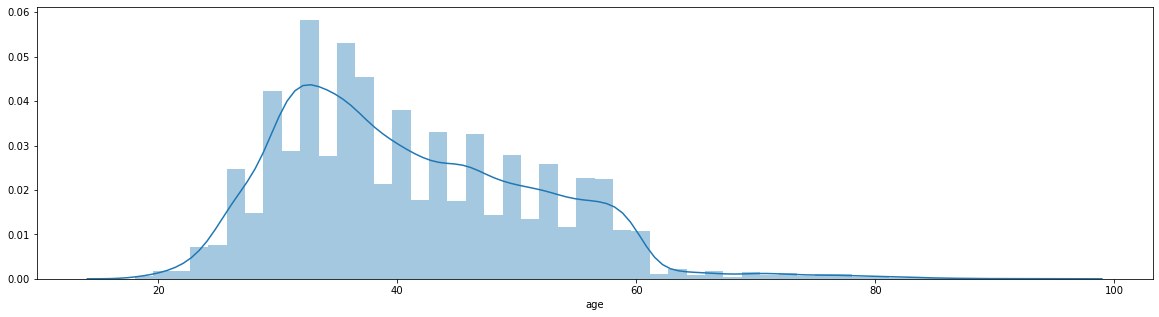

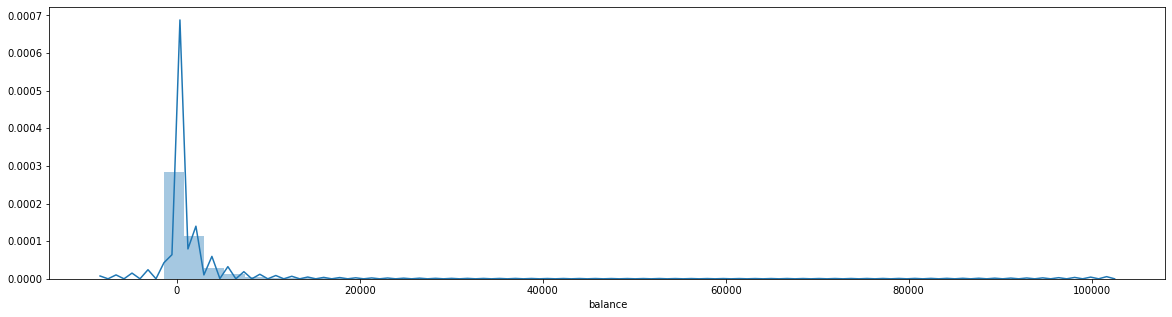

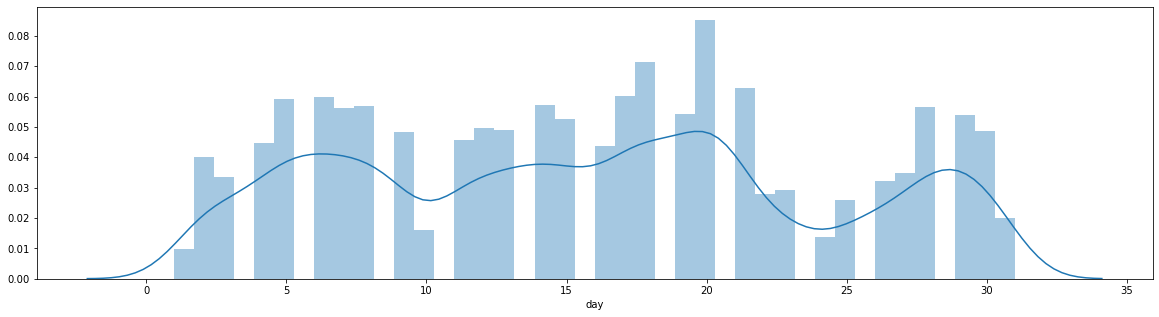

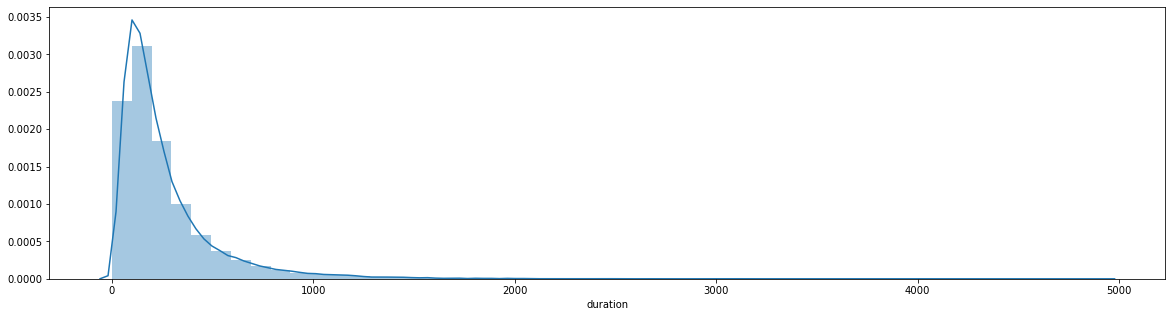

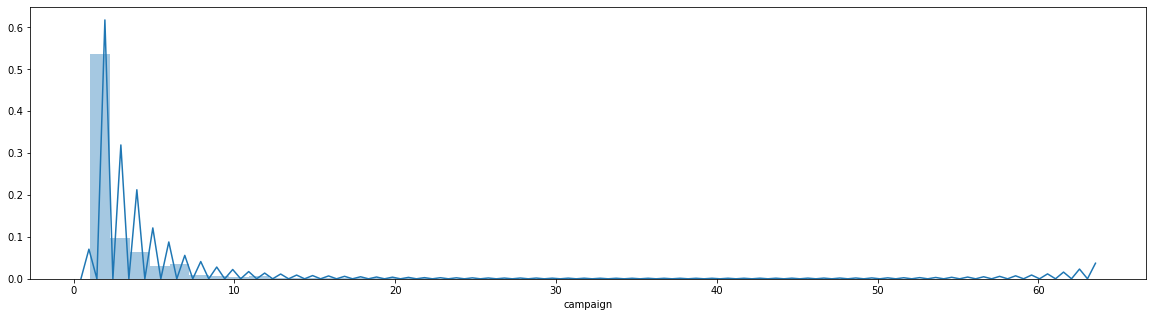

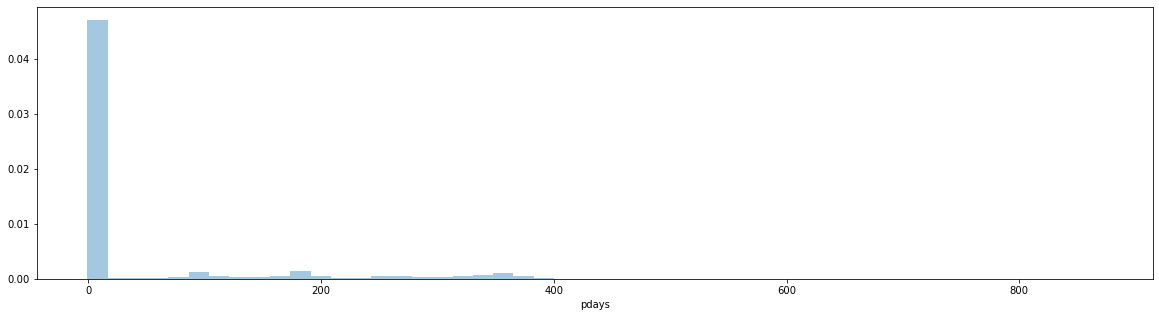

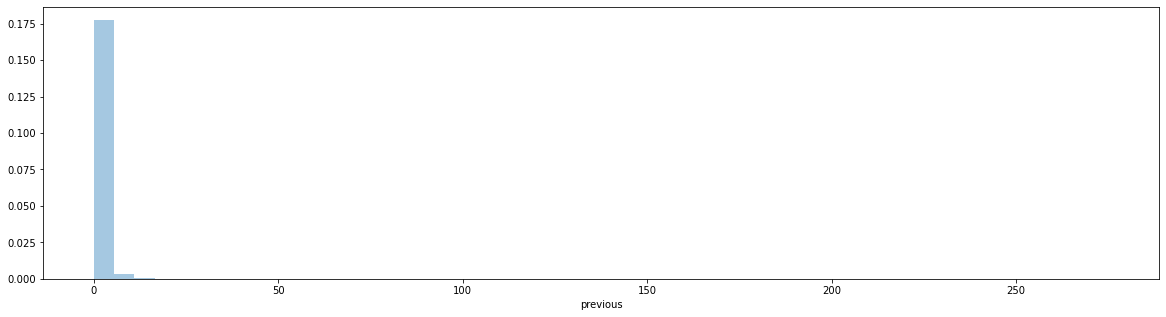

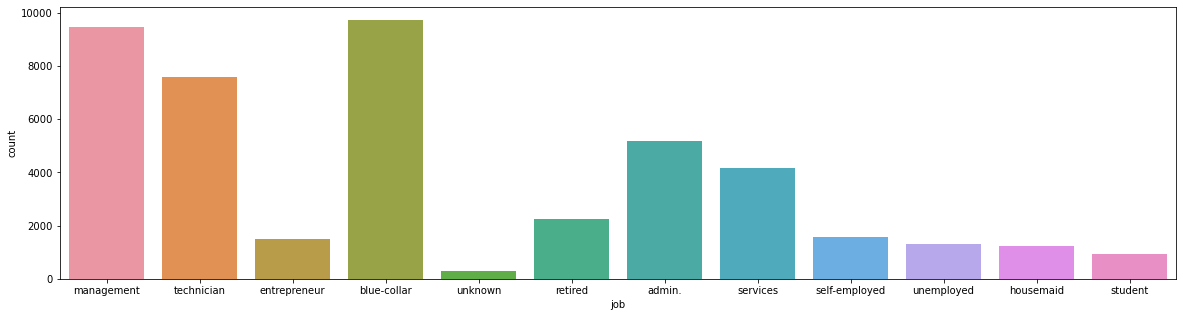

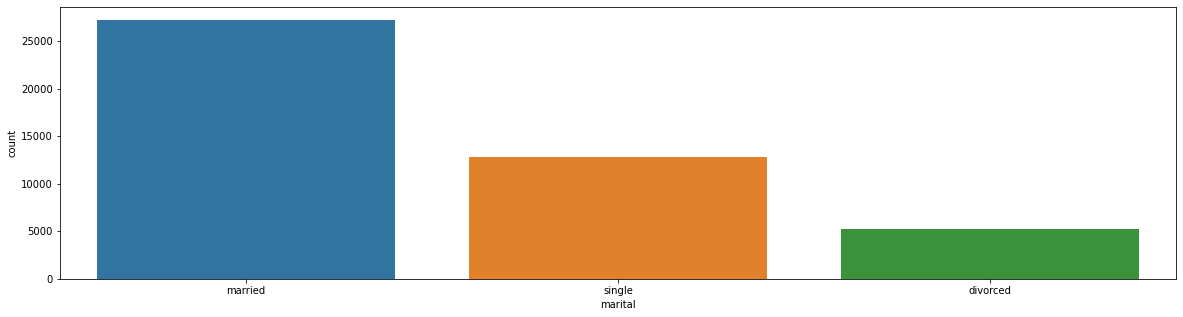

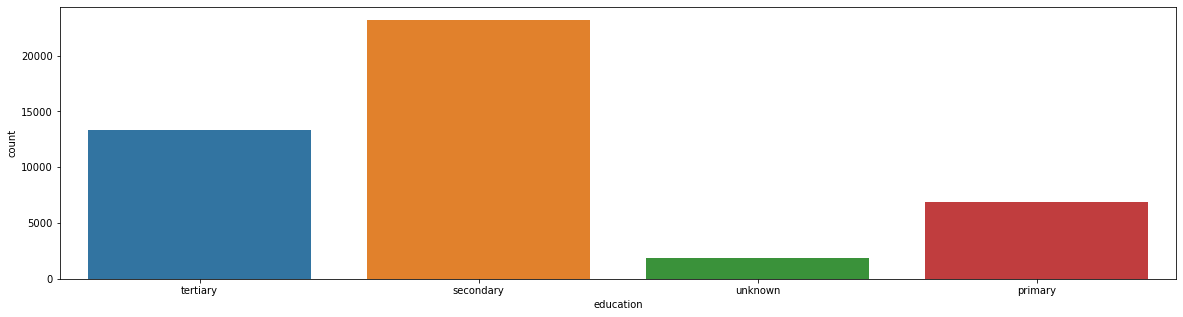

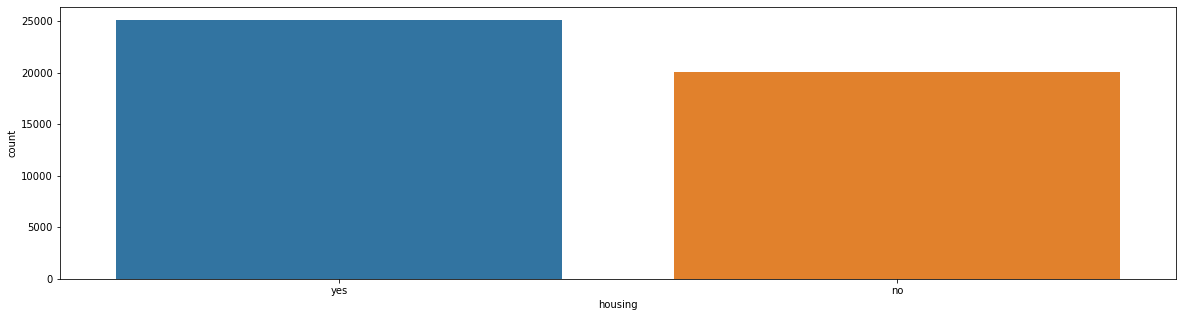

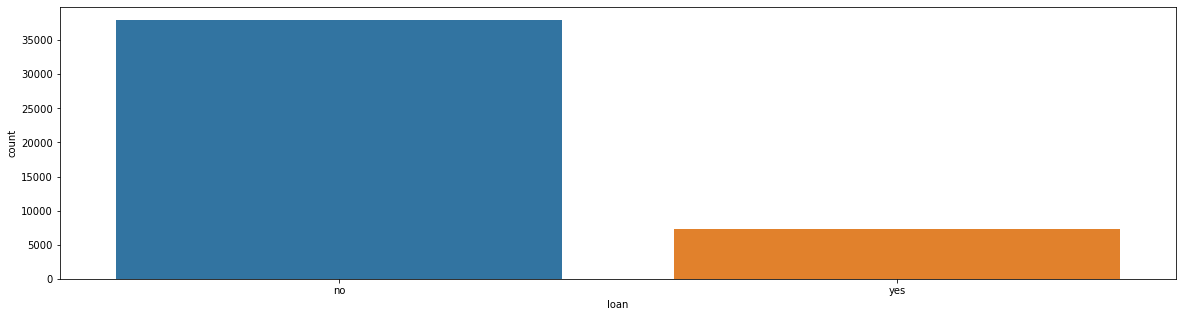

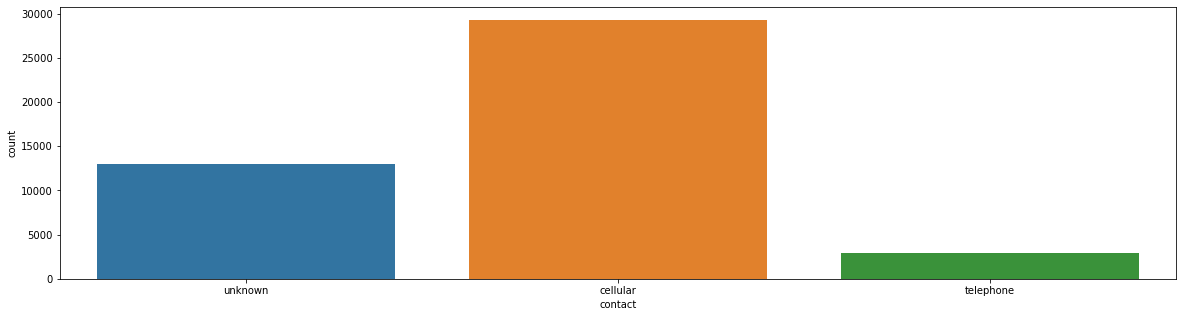

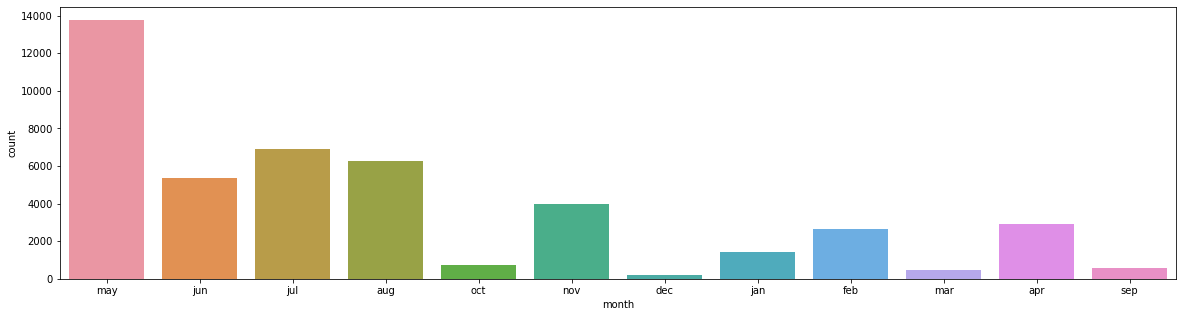

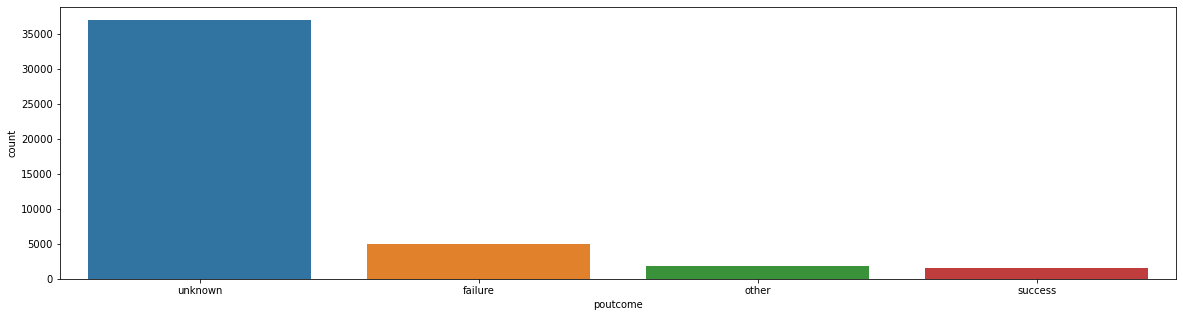

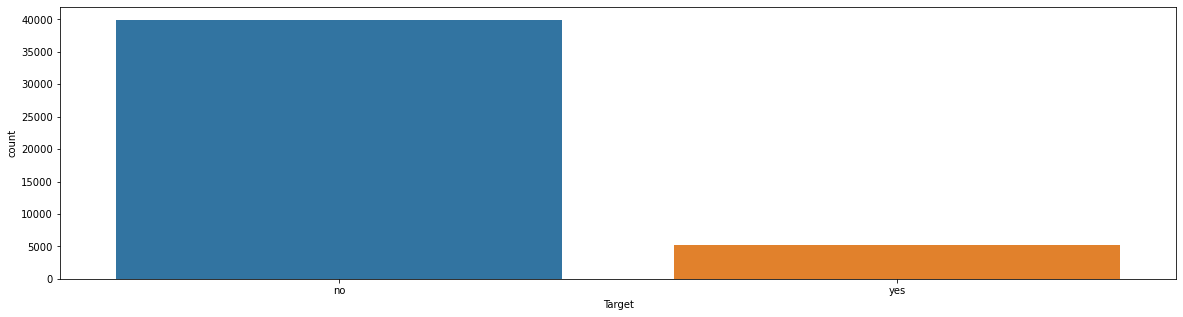

In [10]:
plot_univariate(bank_df)

### Insights
- The distribution of age has an extensive age range, from 18 to 95 years old. However, a majority of customers called is around 30 - 50 years old. The distribution of customer age is fairly normal compared to other distributions.
- As noted before, distribution of balance has a huge standard deviation relative to the mean, resulting in highly skewed distribution of values. This should be expected in real world scenarios.
- The distribution of duration is also highly skewed. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes.
- Month of May has highest count in the data and month of December has the least count.
- Management, Techician and Blue-Collar jobs comprises majority of the count.

**Let's find the percentage of outliers, in each column of the data, using IQR.**

In [11]:
Q1 = bank_df.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = bank_df.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

print('Lower Bound for NON Outliers')
print(lower)
print()
print('Upper Bound for NON Outliers')
print(upper)

Lower Bound for NON Outliers
age            10.50
balance    -1,962.00
day           -11.50
duration     -221.00
campaign       -2.00
pdays          -1.00
previous        0.00
dtype: float64

Upper Bound for NON Outliers
age           70.50
balance    3,462.00
day           40.50
duration     643.00
campaign       6.00
pdays         -1.00
previous       0.00
dtype: float64


In [12]:
((bank_df < lower) | (bank_df > upper)).sum()/len(bank_df)*100       #Calculating the percentage of outliers in the data.

Target       0.00
age          1.08
balance     10.46
campaign     6.78
contact      0.00
day          0.00
duration     7.16
education    0.00
housing      0.00
job          0.00
loan         0.00
marital      0.00
month        0.00
pdays       18.26
poutcome     0.00
previous    18.26
dtype: float64

In [13]:
#After identifying outliers, we can decide whether to remove them or not. It depends on your approach, here we are not going to treat them 

#median=bank_df.median()

#for column in ['age','balance','campaign','duration','pdays','previous']:
#    bank_df[column].replace(to_replace=bank_df[column].loc[((bank_df[column] < lower[column]) | (bank_df[column] > upper[column]))],value=median[column],inplace=True)

**We can verify the result observed above using boxplots.**
- The bottom black horizontal line of blue box plot is called 'minimum' and is calculated as Q1-1.5*IQR.
- First black horizontal line of rectangle shape of blue box plot is First quartile or 25 percentile.
- Second black horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median.
- Third black horizontal line of rectangle shape of blue box plot is third quartile or 75%.
- Top black horizontal line of rectangle shape of blue box plot is called 'maximum' and is calculated as Q3+1.5*IQR.
- Small diamond shape of blue box plot is outlier data or erroneous data. Which is below the bottom black horizontal line.

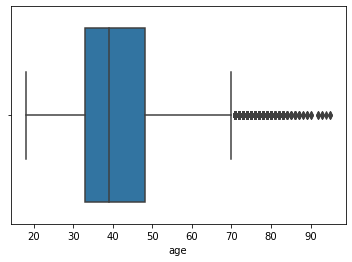

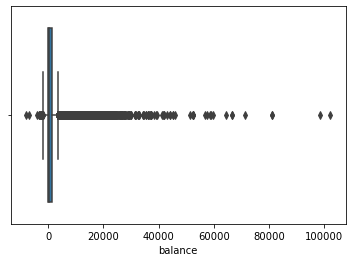

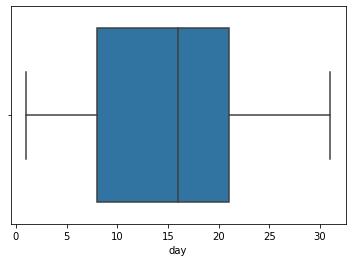

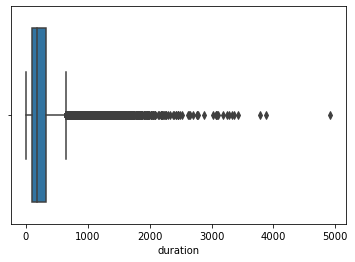

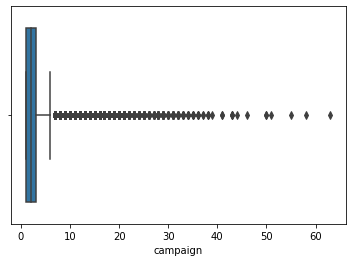

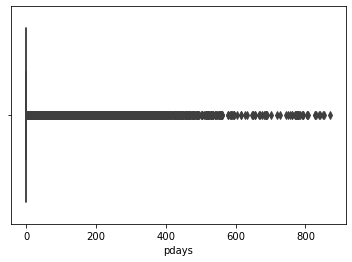

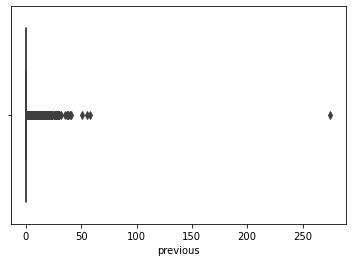

In [14]:
for column in bank_df.select_dtypes(include='number'):
    sns.boxplot(bank_df[column])
    plt.show()

### Multivariate

**Let's create a general function to plot boxplots of continuous variables VS target variable and countplots for categorical variables with hue='target_variable'.** 

In [15]:
def plot_bivariate(dataframe,target):
    num_var=dataframe.select_dtypes(include='number')
    cat_var=dataframe.select_dtypes(include='object')
    for column in num_var.columns:
        sns.boxplot(x=dataframe[column],y=dataframe[target])
        plt.show()
    for column in cat_var.columns:
        if column!=target:
            plt.figure(figsize=(20,5))
            sns.countplot(dataframe[column],hue=dataframe[target])
            plt.show()

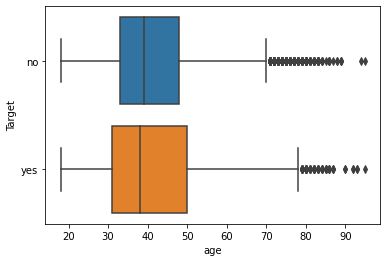

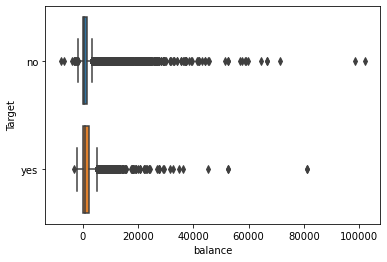

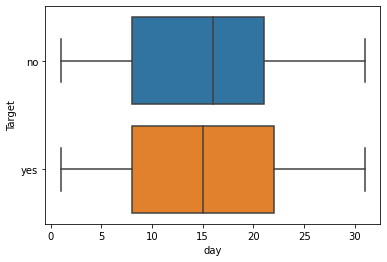

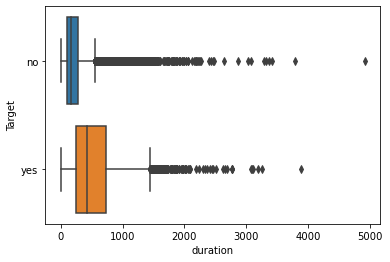

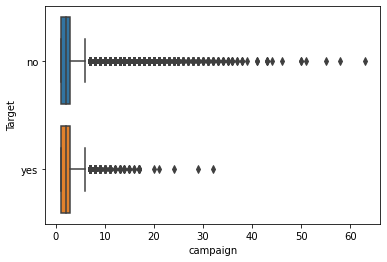

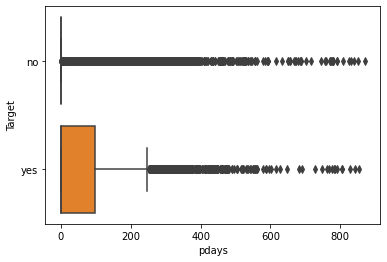

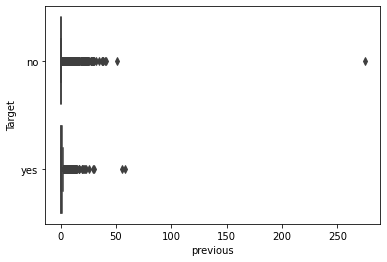

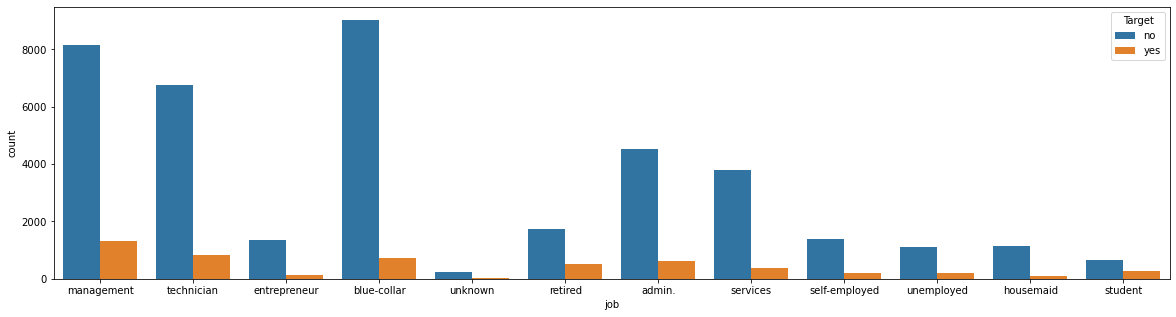

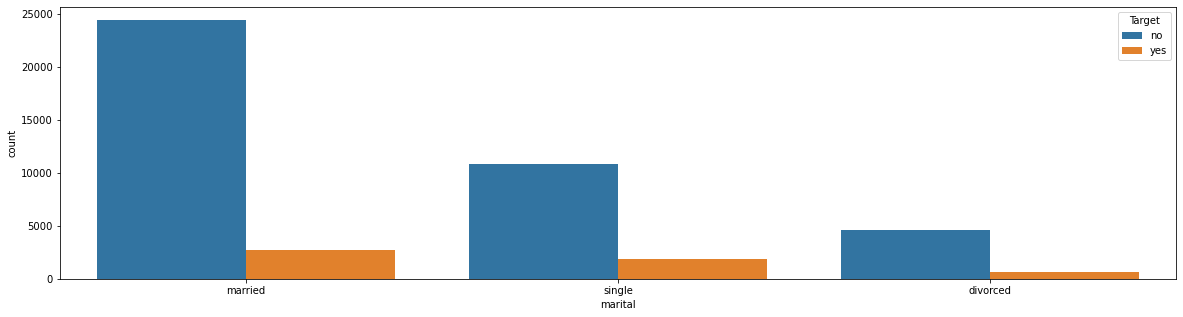

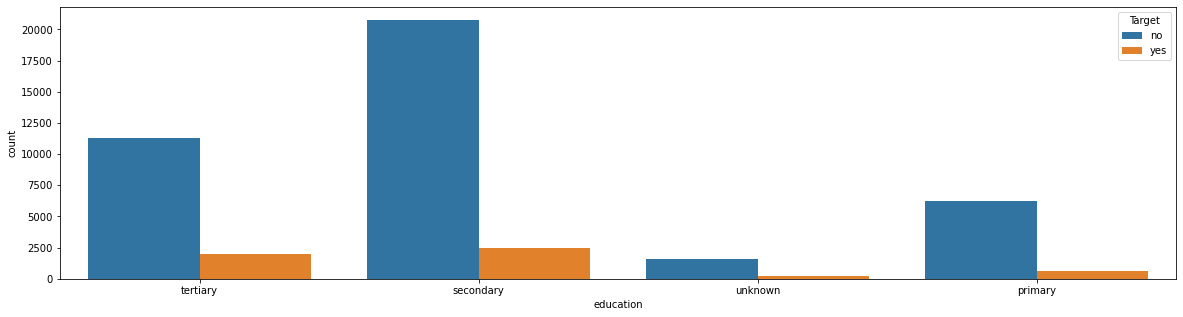

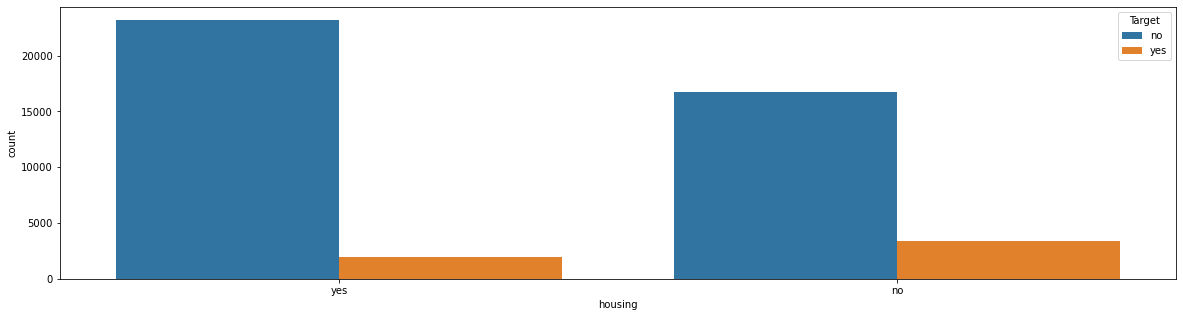

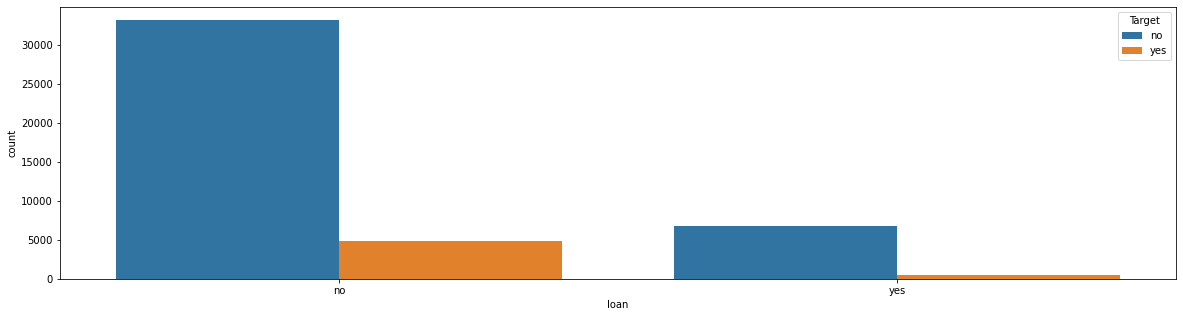

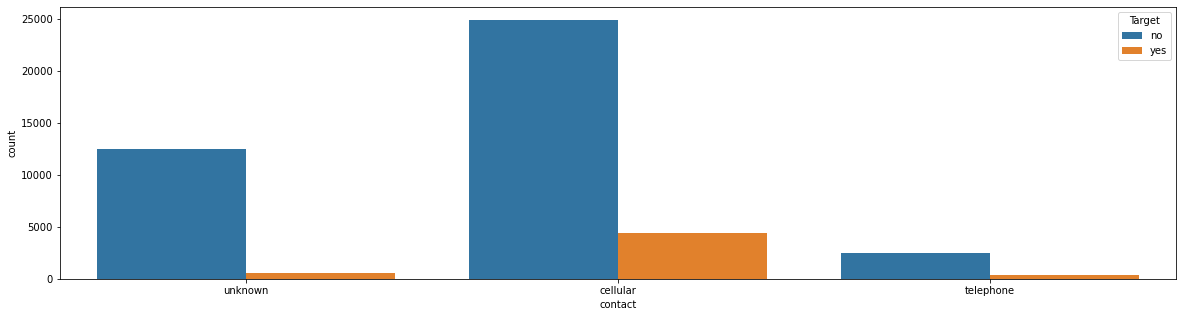

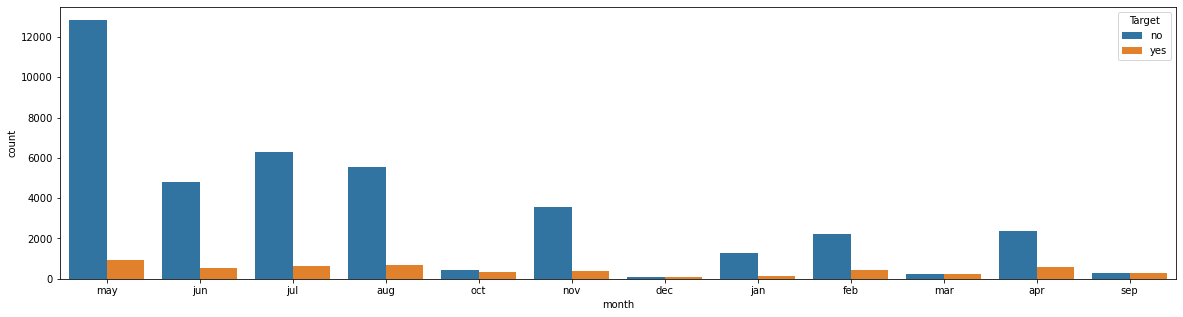

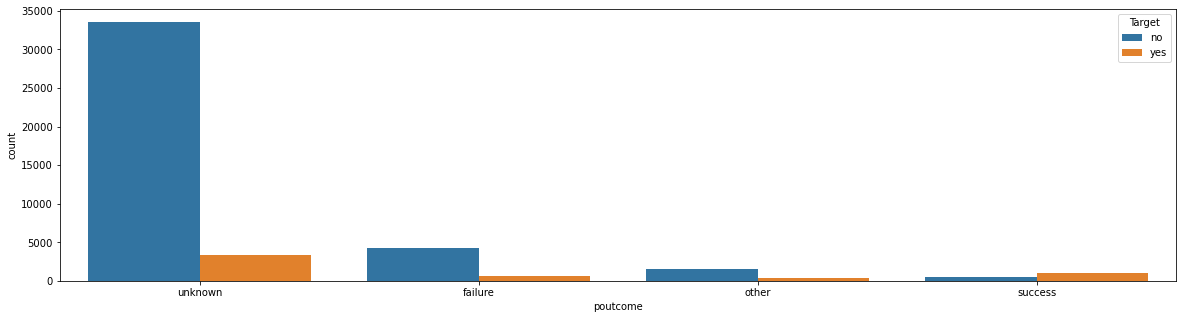

In [16]:
plot_bivariate(bank_df,'Target')

**We can plot a heatmap to check the degree of correaltion between independent variables.**

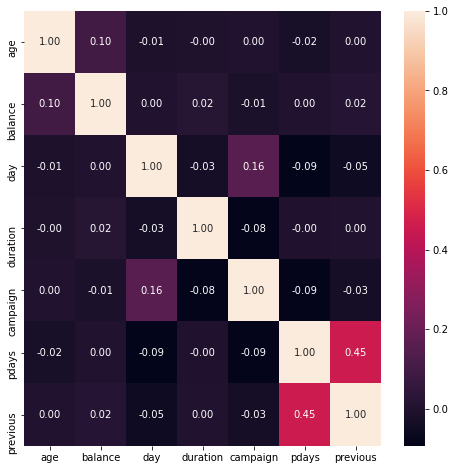

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(bank_df.corr(),annot=True,fmt='0.2f')

- We can see that there is no correlation greater than 50%.

In [18]:
#Group numerical variables by mean for the classes of Y variable
np.round(bank_df.groupby(["Target"]).mean() ,1)

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.80,"1,303.70",15.90,221.20,2.80,36.40,0.50
yes,41.70,"1,804.30",15.20,537.30,2.10,68.70,1.20


- The mean balance is higher for customers who subscribe to the term deposit compared to those who dont.
- Number of days that passed by after the client was last contacted from a previous campaign is higher for people who have subscribed.
- Length of duration is also higher for customers who subscribe.
- All of the above facts indicate that customers with a higher balance and those who have been in contact for longer duration tend to subscribe for the term deposit.

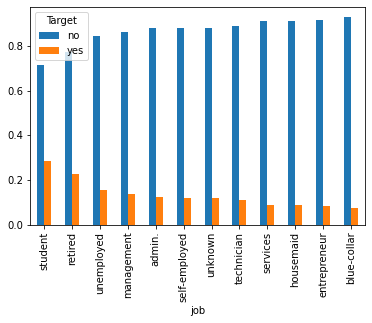

In [19]:
pd.crosstab(bank_df['job'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False ).plot(kind='bar')

- We can see that students and retired people are more likely to sucbcribe for the term deposit.
- It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable to the eldest.
- The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students.

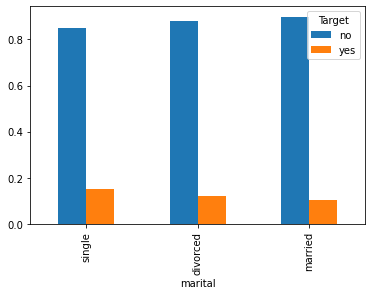

In [20]:
pd.crosstab(bank_df['marital'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False ).plot(kind='bar')

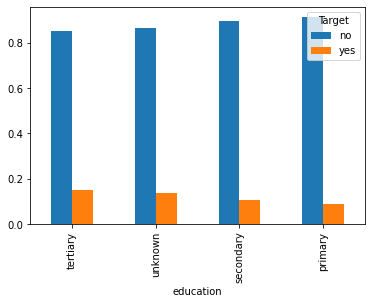

In [21]:
pd.crosstab(bank_df['education'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False ).plot(kind='bar')

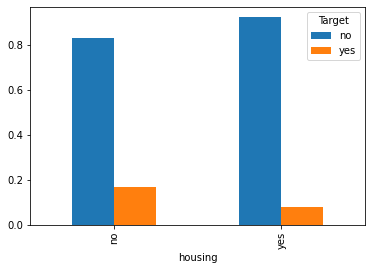

In [22]:
pd.crosstab(bank_df['housing'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False ).plot(kind='bar')

- People wiht no previous housing loan are more likley to subcribe for the term deposit. This makes sense as such people might have commmitment to return the loan before investing their money in term deposit.

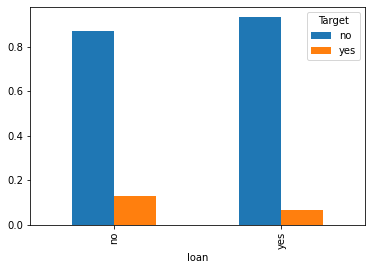

In [23]:
pd.crosstab(bank_df['loan'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False ).plot(kind='bar')

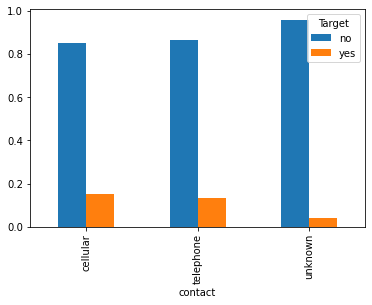

In [24]:
pd.crosstab(bank_df['contact'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False ).plot(kind='bar')

contact,cellular,telephone,unknown,All
month,,,,
All,29285,2906,13020,45211
may,5331,460,7975,13766
jul,5767,852,276,6895
aug,5950,246,51,6247
jun,729,80,4532,5341
nov,3540,379,51,3970
apr,2727,199,6,2932
feb,2362,274,13,2649
jan,1265,129,9,1403


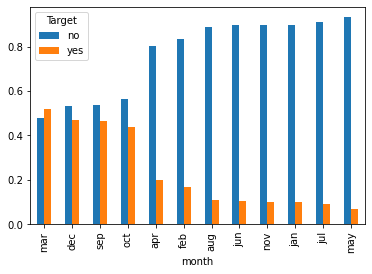

In [25]:
pd.crosstab(bank_df['month'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False ).plot(kind='bar')
print()
pd.crosstab(bank_df['month'],bank_df['contact'],margins=True).sort_values(by='All',ascending=False)

- We can see that most people are contacted in the month of MAY.
- Maximum subcriptions are in the month of MARCH and December.

In [26]:
# Not a necessary step, but it helps having more categorical variables when target is categorical


#Binning balance

#bin_edges=[-8020,0,72,448,1428,102128]
# first value is min value -1 of the column and last value is max +1  of the column, so that all values are included
# you can choose middle value on your own or select 25th, 50th and 75th percentile value
#bin_names=['very low','low','medium','high','very high']
# Names of each bin or category
#bank_df['balance'] = pd.cut(bank_df['balance'],bin_edges,labels=bin_names)

In [27]:
# Not a necessary step, but it helps having more categorical variables when target is categorical

#Binning Campaign

#bin_edges=[17,30,45,60,96]
# first value is min value -1 of the column and last value is max +1  of the column, so that all values are included
# you can choose middle value on your own or select 25th, 50th and 75th percentile value
#bin_names=['<30','30-45', '45-60','>60']
# Names of each bin or category
#bank_df['age'] = pd.cut(bank_df['campaign'],bin_edges,labels=bin_names)

## <a id = "link3"></a>Deliverable 2 - Prepare data to build model

In [28]:
# Separating independent and dependent variables. We are using one hot encoding for all variables as most of the variables are
# nomial and not ordinal. For eg. we can't generalize any order for single, married or divorced.

X = bank_df.drop("Target" , axis=1)
y = bank_df["Target"]   
X = pd.get_dummies(X, drop_first=True)

In [29]:
from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed,stratify=y)

**stratify argument in train_test_split makes sure that distribution of classes in train and test data is same as the original dataset. We can verify the same.**

In [30]:
X_train.shape,X_test.shape

((31647, 41), (13564, 41))

In [31]:
y_train.value_counts(normalize=True)

no    0.88
yes   0.12
Name: Target, dtype: float64

In [32]:
y_test.value_counts(normalize=True)

no    0.88
yes   0.12
Name: Target, dtype: float64

## <a id = "link4"></a>Deliverable 3 - Create the model

In [33]:
from sklearn.metrics import recall_score, confusion_matrix, classification_report, precision_score, accuracy_score

### Decision Tree

In [34]:
algo= []
train = []
test = []
recall = []
precision = []

# Blanks list to store model name, training score, testing score, recall and precision.

In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#instantiating decision tree as the default model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
#training acuracy
dt_model.score(X_train, y_train)

1.0

In [37]:
#testing acuracy
dt_model.score(X_test, y_test)

0.8690651725154822

**It is a classic case of model overfitting as we have perfect training score but testing score is very low comapred to the training score.**

**Note: -** Decision Tree is a non-parametric algorithm and hence prone to overfitting easily. This is evident from the difference in scores in training and testing. In ensemble techniques, we want multiple instances (each different from the other) and each instance to be overfit. Hopefully, the different instances will do different mistakes in classification and when we club them, their# errors will get cancelled out giving us the benefit of lower bias and lower overall variance errors.

In [38]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 7, max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

y_pred=clf_pruned.predict(X_test)

algo.append('Decision Tree')
train.append(clf_pruned.score(X_train, y_train))
test.append(clf_pruned.score(X_test, y_test))
recall.append(recall_score(y_test,y_pred,average='binary',pos_label='yes'))
precision.append(precision_score(y_test,y_pred,average='binary',pos_label='yes'))

In [39]:
## Calculating feature importance
feature_cols = X_train.columns

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)[0:10] #Top 10 features

,0
duration,0.58
poutcome_success,0.32
contact_unknown,0.10
age,0.00
month_jan,0.00
housing_yes,0.00
loan_yes,0.00
contact_telephone,0.00
month_aug,0.00
month_dec,0.00


In [40]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [41]:
print("Training Accuracy:",accuracy_score(y_train, preds_pruned_train))
print()
print("Training Accuracy:",accuracy_score(y_test, preds_pruned))
print()
print("Recall:",recall_score(y_test, preds_pruned, pos_label='yes'))
#Here, pos_label = 'yes' tells the metric that for which class we are interested to use for calculating recall. 

Training Accuracy: 0.8998641261414984

Training Accuracy: 0.9017251548215865

Recall: 0.34530560806553245


**Overfitting is reduced after pruning the tree, but it is an example where only accuracy is not a good measure of model perforamce as accuracy is approx. 90% but recall score for concerned class is just 34.5%.**

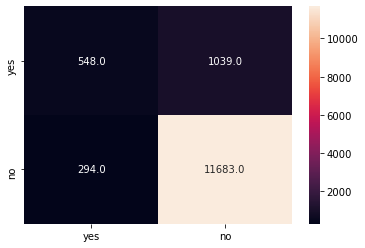

In [42]:
sns.heatmap(confusion_matrix(y_test,y_pred,labels=['yes','no']),annot=True,xticklabels=['yes','no'],yticklabels=['yes','no'],fmt='0.1f')

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     11977
         yes       0.65      0.35      0.45      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



### Ensemble Models

In [44]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=7)

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

algo.append('Random Forest')
train.append(model.score(X_train, y_train))
test.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,y_pred,average='binary',pos_label='yes'))
precision.append(precision_score(y_test,y_pred,average='binary',pos_label='yes'))

In [45]:
# Bagging
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(random_state=7,n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True)

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

algo.append('Bagging')
train.append(model.score(X_train, y_train))
test.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,y_pred,average='binary',pos_label='yes'))
precision.append(precision_score(y_test,y_pred,average='binary',pos_label='yes'))

In [46]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=7,n_estimators= 200, learning_rate=0.1)

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

algo.append('AdaBoost')
train.append(model.score(X_train, y_train))
test.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,y_pred,average='binary',pos_label='yes'))
precision.append(precision_score(y_test,y_pred,average='binary',pos_label='yes'))

In [47]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=7, n_estimators=200,)

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

algo.append('Gradient Boosting')
train.append(model.score(X_train, y_train))
test.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,y_pred,average='binary',pos_label='yes'))
precision.append(precision_score(y_test,y_pred,average='binary',pos_label='yes'))

In [48]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = train
results['Testing Score'] = test
results['Recall'] = recall
results['Precision'] = precision
results = results.set_index('Model')
results

,Training Score,Testing Score,Recall,Precision
Model,,,,
Decision Tree,0.90,0.90,0.35,0.65
Random Forest,1.00,0.91,0.40,0.67
Bagging,1.00,0.91,0.46,0.63
AdaBoost,0.90,0.90,0.29,0.67
Gradient Boosting,0.92,0.91,0.44,0.66


**We can see that two top models are Bagging and Gradient Boosting classifier (in terms of recall score) but Bagging classifier is clearly overfitting and has lower precision than Gradient Boosting. So, we can choose Gradient Boosting classifier for this problem.**

In [49]:
feat_imp_dict = dict(zip(feature_cols, model.feature_importances_)) #model is graident boosting classifier
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)[0:10] #Top 10 features

,0
duration,0.45
poutcome_success,0.17
age,0.05
pdays,0.05
day,0.05
contact_unknown,0.04
housing_yes,0.03
month_mar,0.03
month_oct,0.02
month_jun,0.02


**Duration and outcome of the previous campaign are the top two features selected by Gradient Boosting Classifier and Decision Tree as well.**

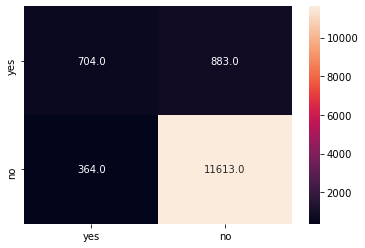

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred,labels=['yes','no']),annot=True,xticklabels=['yes','no'],yticklabels=['yes','no'],fmt='0.1f')

### What Confusion matrix means?
- The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying potential clients that are likely to suscribe to a term deposit. We will see in the confusion matrix four terms the True Positives, False Positives, True Negatives and False Negatives.
- Positive/Negative: Type of Class (label)-"No", "Yes" True/False: Correctly or Incorrectly classified by the model.
- True Negatives (Bottom-Right Square): This is the number of correct classifications of the "No" class or potenial clients that are not willing to suscribe a term deposit.
- False Negatives (Bottom-Left Square): This is the number of incorrect classifications of the "No" class or potential clients that are not willing to suscribe a term depositt.
- False Positives (Top-Right Square): This is the number of incorrect classifications of the "Yes" class or potential clients that are willing to suscribe a term deposit.
- True Positives (Top-Left Square): This is the number of correct classifications of the "Yes" class or potenial clients that are willing to suscribe a term deposit.

### Precision and Recall:
- Recall: It is the ratio of total number of "Yes" in the label column of the dataset to the number of "Yes" labels does our model detect.

- Precision: Means how sure is the prediction of our model that the actual label is a "Yes".

- Here the company wants more people to subscribe to term deposits. So if we have a customer who is willing to subscribe then we shouldn't loose that customer. Therefore focus shpould be on False negative. Decreasing FN and increasing recall.

## <a id = "link5"></a>Business Recommendations

- When implementing a marketing strategy, external factors, such as the time of calling, should also be carefully considered. The previous analysis points out that March, September, October and December had the highest success rates. So, these months should be targeted by the bank to approach customers.
- We saw that students and retired people are more likely to subcribe for the term deposit. Bank can identify this and can prioritize their strategy for these people to be better.
- Marital status, occupation or whether they have previous loan or not reveal a customer's life stage and indicates his/her overall risk profile. With this information, the bank can estimate when a customer can/will make an investment.
- Bank can target individuals with higher call duration as we saw they are more likely to go for the term deposit.
- We can focus on the features which the model has given top preference while calculating the result.
- As data scientists, we can further increase the recall rate for 'yes' class or get more data to make the model better. Then, we can deploy that model in production and can identify the whether that customer would opt for the term depost or not based on the feature imformation we have.